In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## 진행순서

# 1. EDA
#   데이터 시각화
# 2. Modeling
#   대략적인 함수 찾기
#   손실함수 적용 _ 아직 불완전한 현재의 모델이 출력하는 값과 실제 정답 간의 차이를 확인하는 과정
#   수치미분이 가능하도록 하기 위한 대략적인 w,b값 설정 
#   GD로 w' - w, b' - b 구현
# 3. train
#   leraning rate 수치 설정
#   GD로 1차원 모델 학습
#   loss 저장 및 시각화
#   w, b 확인
# 4. test
#   test set에 확인을 위한 prediction, error값 추가
#   rmse 적용 후 수치 확인
#   데이터 모델 시각화



# 하이퍼 파라미터 = 모델이 스스로 학습하기 전에 사람이 직접 사전에 정의하고 시작하는 파라미터

![결과](./result.png "결과 시각화")

# EDA

## 시각화

In [3]:
macbook = pd.read_csv('./data/macbook.csv')
print(macbook.shape)
macbook.head()

(80, 2)


,used_years,price
0,2.65,175
1,3.80,63
2,0.95,273
3,4.50,133
4,4.45,106


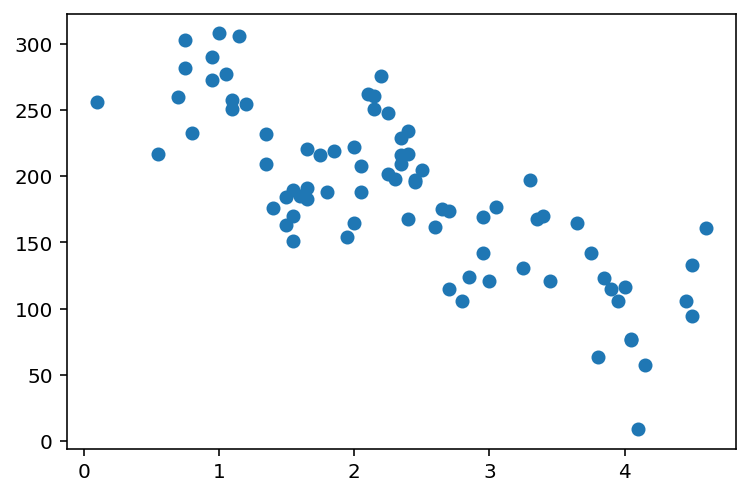

In [4]:
# matplot으로 데이터 분포 시각화하여 확인

%matplotlib inline 
%config InlineBackend.figure_format = 'retina' # 더 높은 해상도로 출력한다.
plt.scatter(macbook['used_years'], macbook['price'])
#                   x좌표                   y좌표
plt.show()

In [5]:
np.corrcoef(macbook['used_years'], macbook['price'])

array([[ 1.        , -0.78972238],
       [-0.78972238,  1.        ]])

<AxesSubplot:>

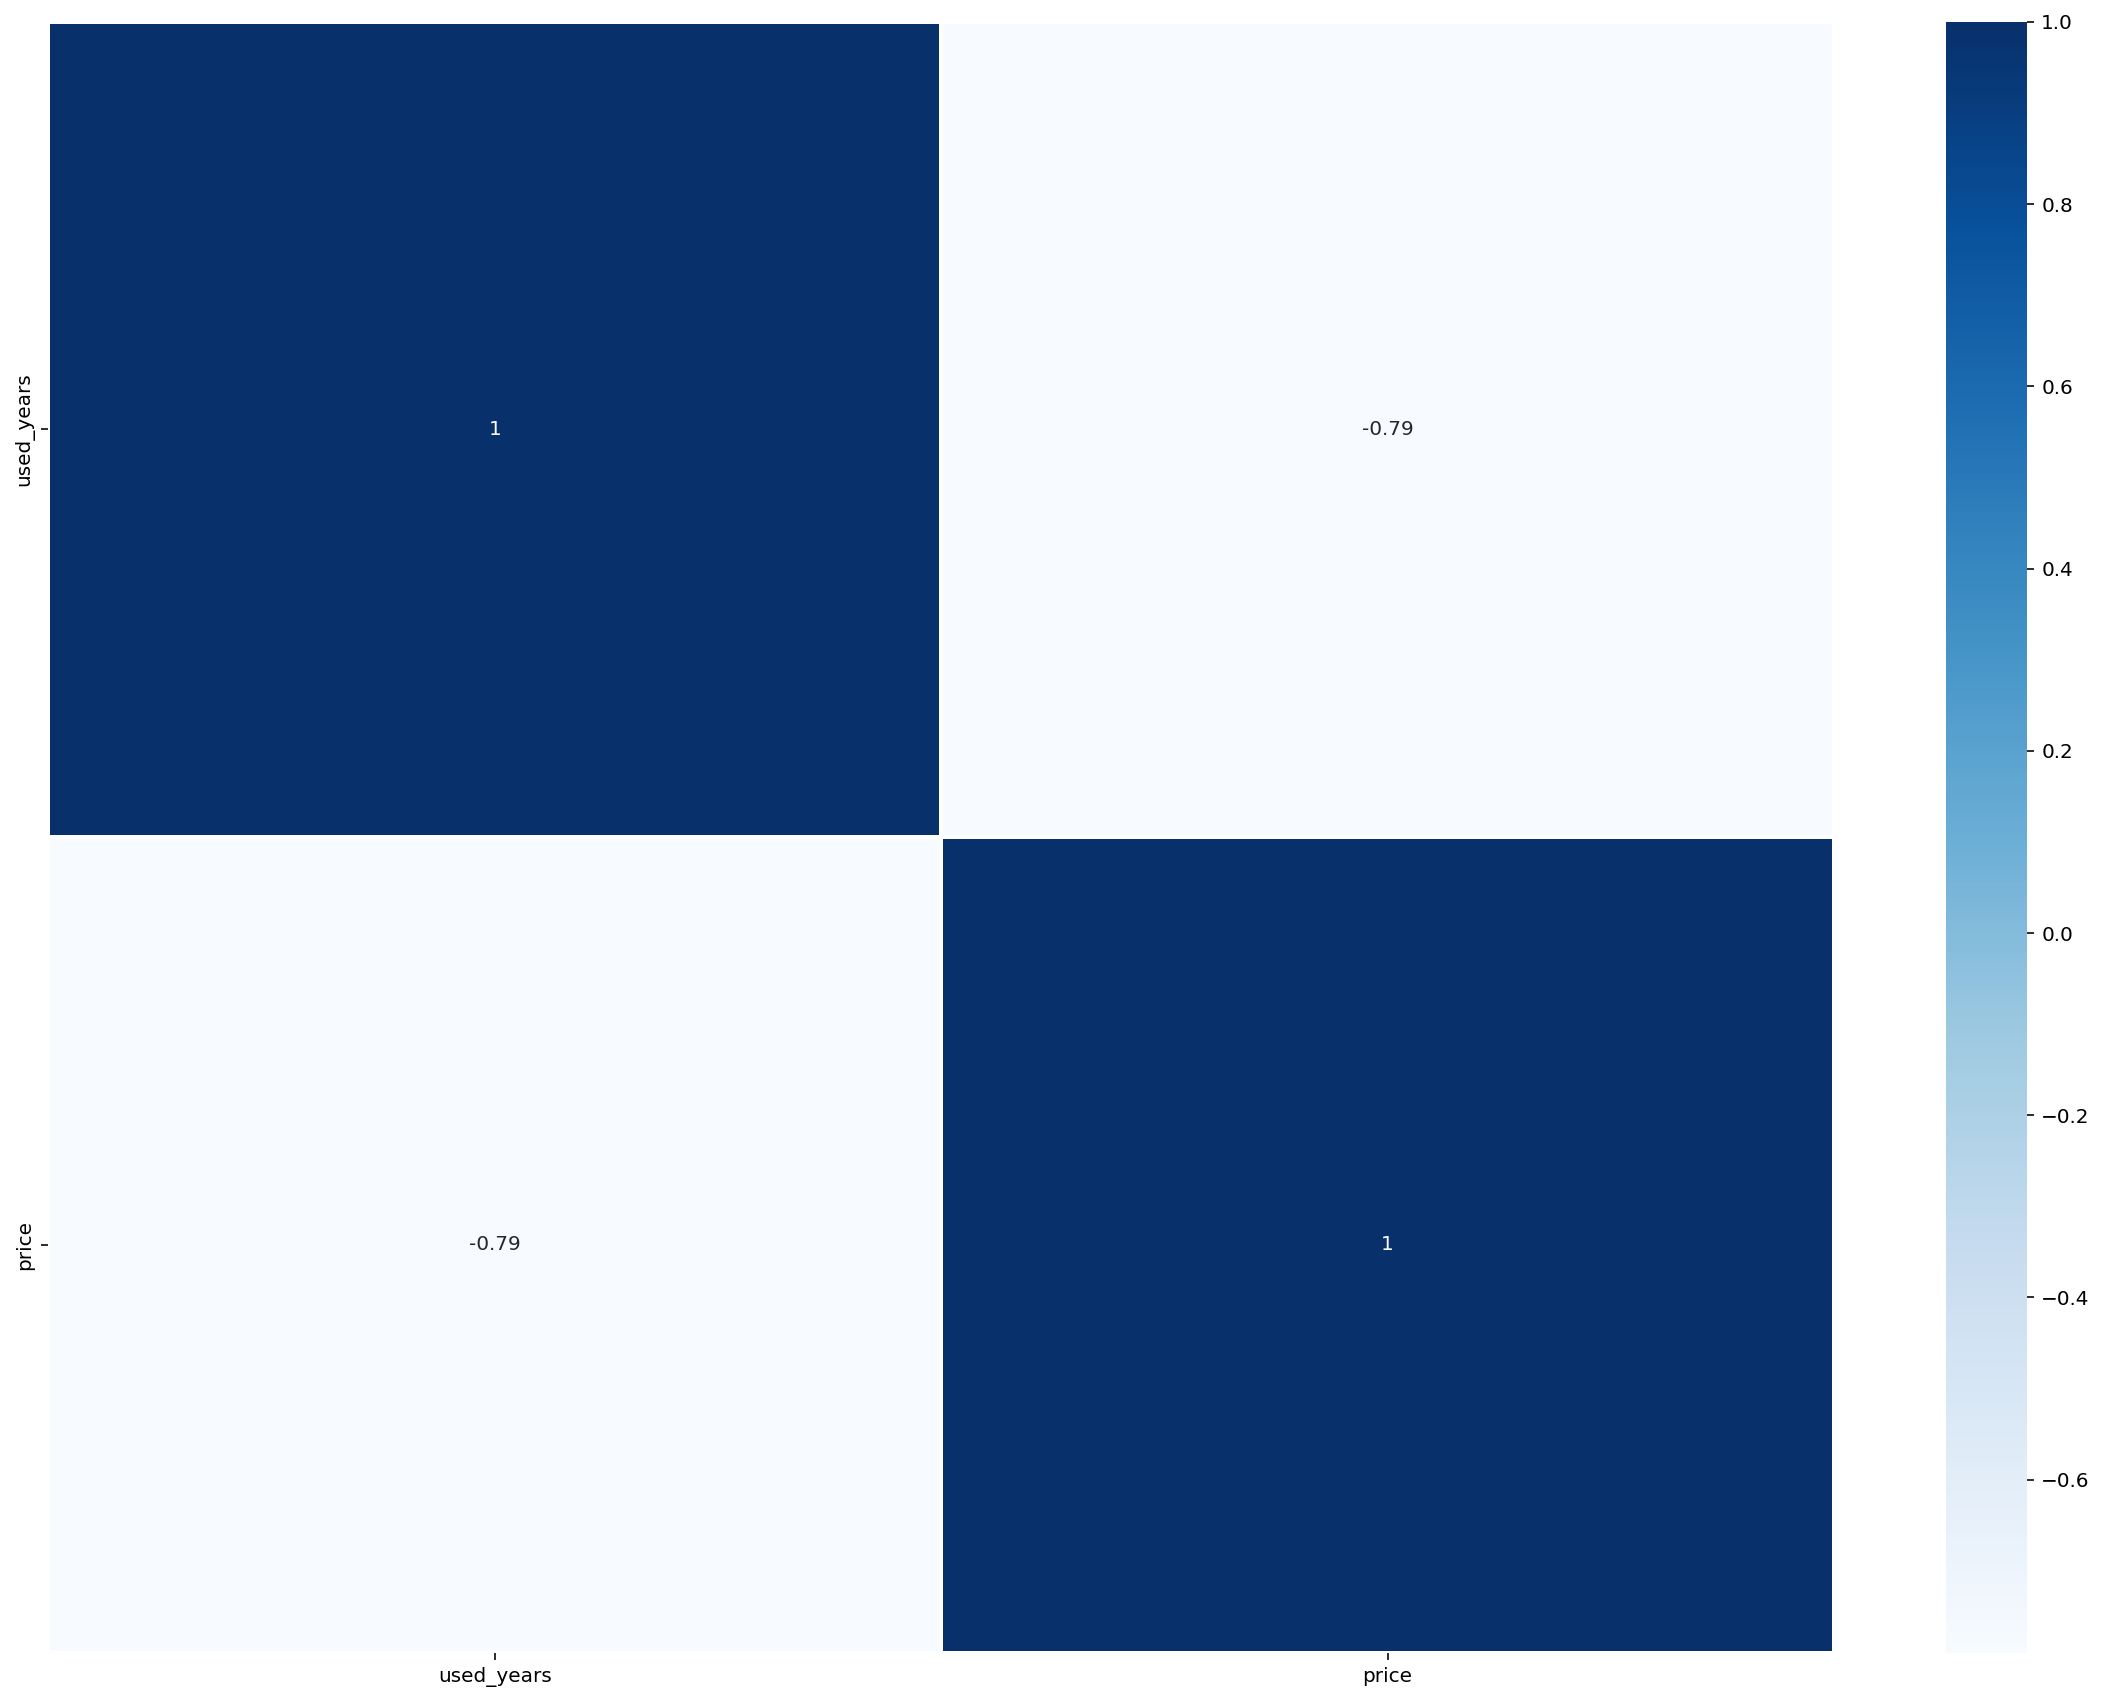

In [6]:
# 2개 밖에 없지만 일단 찍어보고싶었다.
plt.subplots(figsize=(20,15))
sns.heatmap(macbook.corr(), annot=True, linewidths=2, cmap = 'Blues')

In [7]:
y = macbook["used_years"].values
x = macbook["price"].values
# y를 사용년수
# x를 가격으로 지정

def model(x,w,b):
    y = x * w + b
    return y

model(5,2,1)

# 100 = w * 2 + b
# 40 = w * 5 + b
# y = -20x + 140

11

<function matplotlib.pyplot.show(close=None, block=None)>

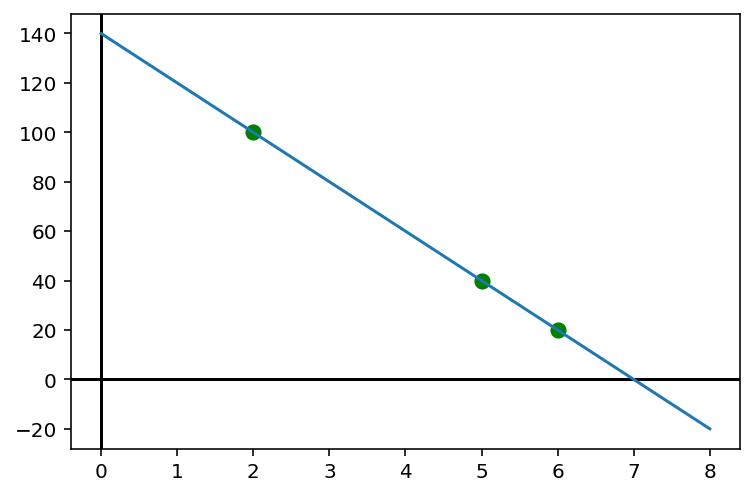

In [8]:
# x축, y축 그리기
plt.axvline(x=0, c='black')
plt.axhline(y=0, c='black')

# y = wx + b일차함수 그리기
x = np.linspace(0,8,9)
y = model(x, w=-20, b=140)
plt.plot(y)

x_data = [2, 5, 6]
y_data = [100, 40, 20]
plt.scatter(x_data, y_data, c='g', s=50)
#           x데이터,  y데이터, 점의 색, 점의 크기

plt.show

# Model

## Modeling

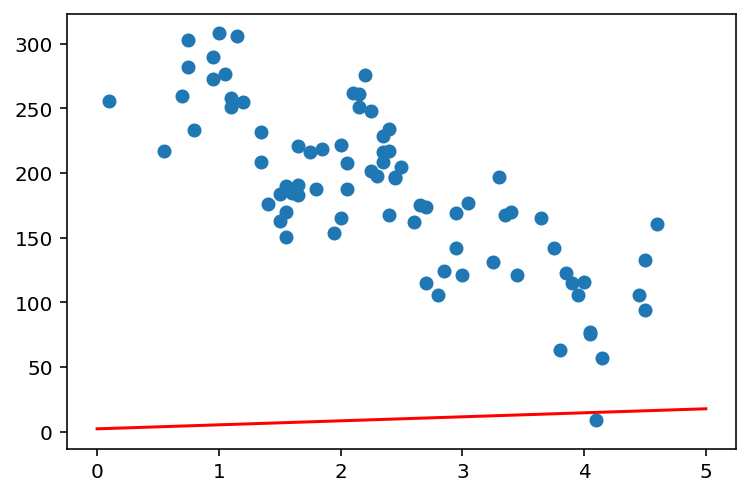

In [9]:
w = 3.1
b = 2.3
# y = 3.1x + 2.3
# 아무 값이나 넣어본거임

x = np.linspace(0, 5, 6)
y = model(x, w, b) # y = 3.1x + 2.3
plt.plot(y, c='r')

plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

In [10]:
x = macbook["used_years"].values
# x에 학습시킬 데이터 넣기
prediction = model(x, w, b) # 현재 w = 3.1, b = 2.3

# 정답과 예측값 간의 차이 피쳐 만들기
# 칼럼 추가
macbook['prediction'] = prediction
macbook['error'] = macbook['price'] - macbook['prediction']

# prediction.shape
macbook.head()

,used_years,price,prediction,error
0,2.65,175,10.515,164.485
1,3.80,63,14.080,48.920
2,0.95,273,5.245,267.755
3,4.50,133,16.250,116.750
4,4.45,106,16.095,89.905


In [11]:
macbook.shape

(80, 4)

In [12]:
## 손실함수 만들기

# MAE : Mean Absolute Error, 오차의 절댓값의 평균
# MSE : Mean Squared Error, 오차의 제곱의 평균
# RMSE : Root Mean Squared Error, MSE의 제곱근
# R-squared : Coefficient of Determination, 결정 계수

# 평가를 위한 RMSE 만들기
def RMSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    rmse = mse ** 0.5        # MSE의 제곱근
    return rmse

# x = macbook["used_years"].values
# y = macbook["used_years"].values
# 에서
# y = model(x, w=-20, b=140)
# 에서
# y = model(x, w, b)
# 인데, 원본 price 피쳐를 넣은 이유는 모델에 넣고 돌릴거니까

x = macbook["used_years"].values
y = macbook["price"].values

# predictions = model(x, w, b)
# rmse = RMSE(predictions, y)
# rmse

# 모델이 예측하는 출력값과 정답값 간의 거리를 나타내는 함수
# 위 식을 함수화


def loss(x, w, b, y):
    predictions = model(x, w, b)
    # x = input data
    # w = weight
    # b = bias
    # y = 내가 학습시킨 모델의 정확도
    L = RMSE(predictions, y)
    return L
    return L

In [13]:
## GD
# y = wx + b
# 에서 b는 찾았다고 가정하고, w를 찾는 방법

# w′ = w − ηg
# w' = 새로운 w _ 최적이라고 예상되는 w
# η = 얼마나 업데이트 할 지 결정하는 상수 (학습률)
# g = 기울기 or GD
# 현재의 w에서 학습률 * GD를 빼면 w'가 나온다.


# GD 구현
def gradient(x, w, b, y):
    dw = (loss(x, w + 0.001, b, y) - loss(x, w, b, y)) / 0.0001
    # w' - w
    db = (loss(x, w, b + 0.001, y) - loss(x, w, b, y)) / 0.0001
    # b' - b
    return dw, db


## Train

In [14]:
x = macbook["used_years"].values
y = macbook["price"].values

# η 정의
LEARNING_RATE = 1

# 랜덤하게 설정
w = 3.1
b = 2.3
w, b


# 단계별로 계산하기 위한 빈 리스트
losses = []

for i in range(1, 2001):
    dw, db = gradient(x, w, b, y)   # 3, 4번: 모델이 prediction을 예측하고, 손실함수값을 계산함과 동시에 기울기 계산

        # def gradient(x, w, b, y):
        #     dw = (loss(x, w + 0.001, b, y) - loss(x, w, b, y))
        #     # w' - w
        #     db = (loss(x, w, b + 0.001, y) - loss(x, w, b, y))
        #     # b' - b
        #     return dw, db

    w -= LEARNING_RATE * dw         # 5번: w = w - η * dw 로 업데이트
    b -= LEARNING_RATE * db         # 5번: b = b - η * db 로 업데이트 
    L = loss(x, w, b, y)            # 현재의 loss 값 계산
    losses.append(L)                # loss 값 기록
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))


Iteration 100 : Loss 39.1029
Iteration 200 : Loss 38.3038
Iteration 300 : Loss 38.3036
Iteration 400 : Loss 38.3036
Iteration 500 : Loss 38.3036
Iteration 600 : Loss 38.3036
Iteration 700 : Loss 38.3036
Iteration 800 : Loss 38.3036
Iteration 900 : Loss 38.3036
Iteration 1000 : Loss 38.3036
Iteration 1100 : Loss 38.3036
Iteration 1200 : Loss 38.3036
Iteration 1300 : Loss 38.3036
Iteration 1400 : Loss 38.3036
Iteration 1500 : Loss 38.3036
Iteration 1600 : Loss 38.3036
Iteration 1700 : Loss 38.3036
Iteration 1800 : Loss 38.3036
Iteration 1900 : Loss 38.3036
Iteration 2000 : Loss 38.3036


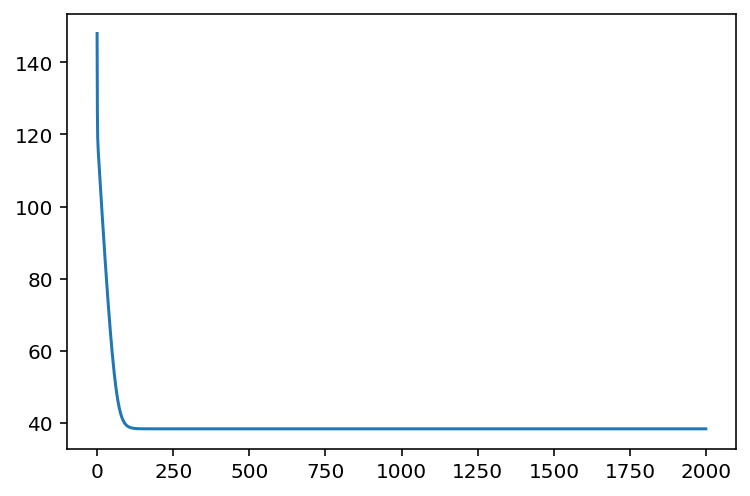

In [15]:
plt.plot(losses)
plt.show()

In [16]:
# w, b 확인

w, b

(-45.04308672358436, 293.4045520280453)

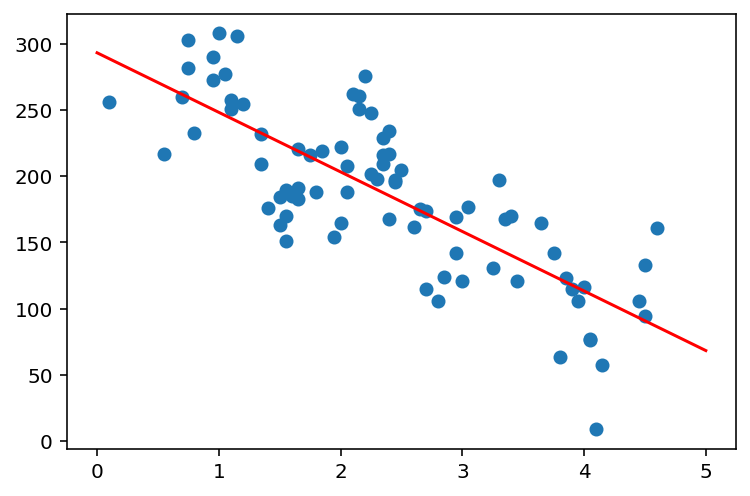

In [17]:
# 확인

# 모델에 넣을 x 값들 준비
x = np.linspace(0, 5, 6)

# x, w, b를 모델에 넣어 y값 출력
y = model(x, w, b)

# 일차함수 y 그리기
plt.plot(y, c="r")


# 원본 데이터 점찍기
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

## Test

In [18]:
# test set

test = pd.read_csv("./data/macbook_test.csv")
print(test.shape)
test.head()

(20, 2)


,used_years,price
0,1.20,203
1,1.85,206
2,2.40,191
3,2.85,164
4,3.05,176


In [19]:
test_x = test['used_years'].values
test_y = test['price'].values

In [20]:
prediction = model(test_x, w, b)
test['prediction'] = prediction
test['error'] = test['price'] - test['prediction']
test

,used_years,price,prediction,error
0,1.20,203,239.352848,-36.352848
1,1.85,206,210.074842,-4.074842
2,2.40,191,185.301144,5.698856
3,2.85,164,165.031755,-1.031755
4,3.05,176,156.023138,19.976862
5,3.35,136,142.510212,-6.510212
6,2.55,133,178.544681,-45.544681
7,2.60,181,176.292527,4.707473
8,2.50,181,180.796835,0.203165
9,3.10,86,153.770983,-67.770983


In [21]:
rmse = ((test['error'] ** 2).sum() / len(test)) ** 0.5
rmse

45.06345008532932

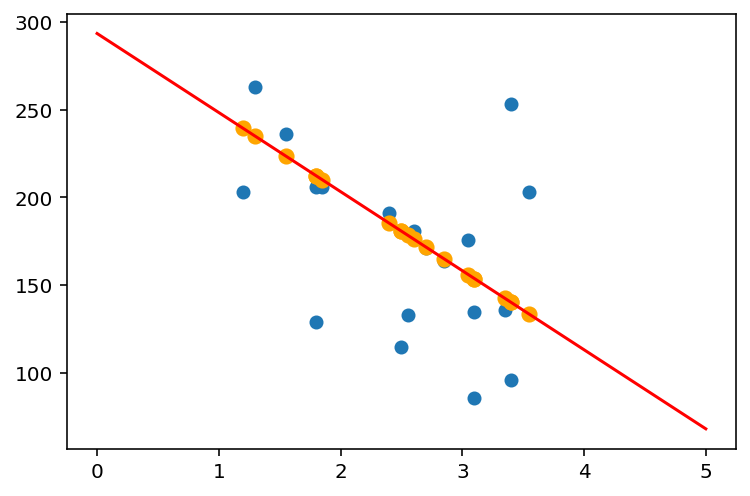

In [29]:
# 모델 일차함수 그리기
x = np.linspace(0, 5, 6)
y = model(x, w, b)
plt.plot(y, c="r")

# 실제 데이터 값
plt.scatter(test['used_years'], test['price'])

# 모델이 예측한 값
plt.scatter(test['used_years'], test['prediction'],c='Orange', s=50)
plt.show()